In [118]:
from catboost import CatBoostClassifier, Pool
import pandas as pd


import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\jayso\Documents\\repoGIT\\BB_ML\\basket_validation\\trainer\\release\\bin\\'
os.environ["PATH"]

'c:\\users\\jayso\\documents\\repogit\\bb_ml\\venv\\lib\\site-packages\\pywin32_system32;c:\\users\\jayso\\documents\\repogit\\bb_ml\\venv\\lib\\site-packages\\pywin32_system32;C:\\Users\\jayso\\Documents\\repoGIT\\BB_ML\\venv\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Python37\\Scripts\\;C:\\Python37\\;C:\\Program Files\\Microsoft MPI\\Bin\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS\\;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS\\;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Fil

In [119]:
class BasketParser:
    # TRAIN_X_COLUMN = ['total_price', 'money_amount',
    #                    'basket_food_j', 'basket_non_food_j',
    #                    'basket_food_j-1', 'basket_non_food_j-1',
    #                    'basket_food_j-2', 'basket_non_food_j-2',
    #                    'basket_food_j-3', 'basket_non_food_j-3',
    #                    'basket_food_j-4', 'basket_non_food_j-4',
    #                    'basket_food_j-5', 'basket_non_food_j-5',
    #                    'basket_food_j-6', 'basket_non_food_j-6']
    TRAIN_X_COLUMN = ['total_price', 'money_amount',
                     'Ration_vital/nonvital_type']
    TRAIN_Y_COLUMN = 'action'
    TRAIN_X = None
    TRAIN_Y = None
    VAL_X = None
    VAL_Y = None
    TEST_X = None
    TEST_Y = None

    def __init__(self):
        pass

    def build_training_dataset(self, path=None):
        loaded = path or "./basket_validation/trainer/training_dataset/training_dataset1.xlsx"
        dataset = pd.read_excel(loaded)
        self.TRAIN_X = dataset[self.TRAIN_X_COLUMN]
        self.TRAIN_Y = list(dataset[self.TRAIN_Y_COLUMN])
        return self.TRAIN_X, self.TRAIN_Y

    def build_validatation_dataset(self, path=None):
        loaded = path or "./basket_validation/trainer/training_dataset/training_dataset2.xlsx"
        dataset = pd.read_excel(loaded)
        self.VAL_X = dataset[self.TRAIN_X_COLUMN]
        self.VAL_Y = list(dataset[self.TRAIN_Y_COLUMN])
        return self.VAL_X, self.VAL_Y

    def build_test_dataset(self, path=None):
        loaded = path or "./basket_validation/trainer/training_dataset/training_dataset3.xlsx"
        dataset = pd.read_excel(loaded)
        self.TEST_X = dataset[self.TRAIN_X_COLUMN]
        self.TEST_Y = list(dataset[self.TRAIN_Y_COLUMN])
        return self.VAL_X, self.VAL_Y

    def shape_for_prediction(self, data):
        # datagramRequest = DatagramRequest()
        # response = datagramRequest.findBarreCode()
        pass

In [120]:
PARSER = BasketParser()

0:	learn: 0.9415929	test: 0.9728841	best: 0.9728841 (0)	total: 27.9ms	remaining: 13.9s
1:	learn: 0.9721048	test: 0.8713283	best: 0.9728841 (0)	total: 56.2ms	remaining: 14s
2:	learn: 1.0000000	test: 0.9464865	best: 0.9728841 (0)	total: 83.6ms	remaining: 13.8s
3:	learn: 0.9721048	test: 0.8957346	best: 0.9728841 (0)	total: 104ms	remaining: 12.9s
4:	learn: 0.8831858	test: 0.7492260	best: 0.9728841 (0)	total: 115ms	remaining: 11.4s
5:	learn: 0.9433638	test: 0.8606811	best: 0.9728841 (0)	total: 137ms	remaining: 11.2s
6:	learn: 0.8831858	test: 0.7994211	best: 0.9728841 (0)	total: 139ms	remaining: 9.77s
7:	learn: 0.9433638	test: 0.8606811	best: 0.9728841 (0)	total: 152ms	remaining: 9.32s
8:	learn: 0.9721048	test: 0.9186524	best: 0.9728841 (0)	total: 164ms	remaining: 8.94s
9:	learn: 0.9721048	test: 0.8900611	best: 0.9728841 (0)	total: 182ms	remaining: 8.94s
10:	learn: 0.9721048	test: 0.8900611	best: 0.9728841 (0)	total: 195ms	remaining: 8.68s
11:	learn: 0.9721048	test: 0.8900611	best: 0.9728841

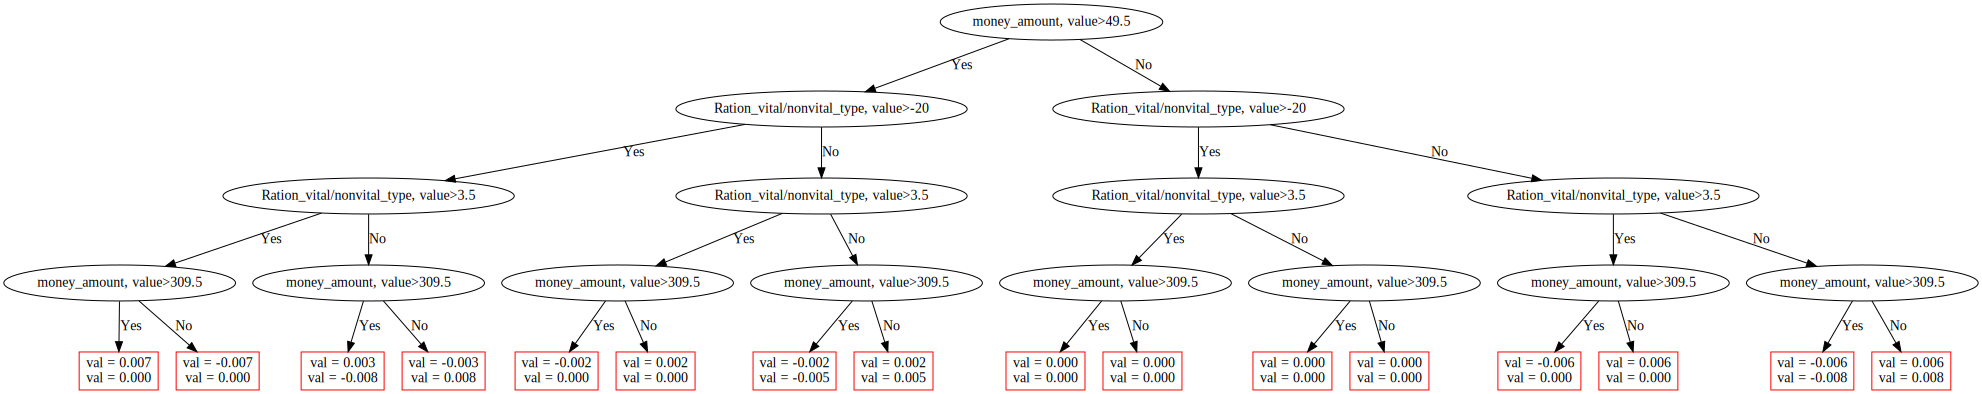

In [121]:
dataset_training_number=1
dataset_validation_number=4
dataset_test_number=3
PARSER.build_training_dataset(path="./training_dataset/training_dataset{}.xlsx".format(dataset_training_number))
PARSER.build_validatation_dataset(path="./training_dataset/training_dataset{}.xlsx".format(dataset_validation_number))
PARSER.build_test_dataset(path="./training_dataset/training_dataset{}.xlsx".format(dataset_test_number))
commun_conf = {
    'iterations': 500,
    'learning_rate': 0.01,
    'depth': 5,
    #'use_best_model': True,
    'random_seed': 42,
    'loss_function': 'MultiClass',
    'eval_metric': 'WKappa',
    }

MODEL = CatBoostClassifier(**commun_conf)
train_dataset = Pool(data=PARSER.TRAIN_X,
                     label=PARSER.TRAIN_Y,
                     cat_features=[0],
                     )
validation_dataset = Pool(data=PARSER.VAL_X,
                          label=PARSER.VAL_Y,
                          cat_features=[0])
test_dataset = Pool(data=PARSER.TEST_X,
                    label=PARSER.TEST_Y,
                    cat_features=[0])
MODEL.fit(train_dataset, eval_set=validation_dataset, silent=False)
preds_class = MODEL.score(test_dataset)
it_index = MODEL.get_best_iteration()
eval_result = MODEL.get_evals_result()
# print("Best iteration row => {}".format(it_index))
# for item in eval_result['learn'].keys():
#     print("training iteration({}) => {}".format(item, eval_result['learn'][item][it_index]))
# print("______________________________________")
# for item in eval_result['validation'].keys():
#     print("training validation({}) => {}".format(item, eval_result['validation'][item][it_index]))
# print("training best score => {}".format(MODEL.get_best_score()))
print("test score => {} ".format(preds_class)) 

MODEL.plot_tree(
    tree_idx=0,
    pool=test_dataset
)

In [122]:
t_predict =PARSER.VAL_X.iloc[4]
result = MODEL.predict([t_predict])
print(PARSER.VAL_X.iloc[4])
print("predicted => {} / Expected => {}".format(result, PARSER.VAL_Y[4]))
PARSER.VAL_X.iloc[0]

total_price                   91
money_amount                  46
Ration_vital/nonvital_type    50
Name: 4, dtype: int64
predicted => [['KO']] / Expected => KO


total_price                   44
money_amount                  22
Ration_vital/nonvital_type     8
Name: 0, dtype: int64

In [123]:
ret = MODEL.save_model('../catboost_iteration/model_with_ratio_evaluation.cbm')

In [124]:
# import pymongo
# from bson.objectid import ObjectId
# 
# client_mongo = pymongo.MongoClient('193.70.89.169', 27017, username="lucasO", password="k[NWun695msH")
# client_mongo = client_mongo['TrustBudget']
# user_profile_collection = client_mongo['big-brother-stats']
# user_historic_collection = client_mongo['user-purchase-historics']
# user_profile = user_profile_collection.find_one({"user_id": ObjectId('5d750f6c68e6a600111c37a3')})
# user_historic = user_historic_collection.find({"user_id": ObjectId('5d750f6c68e6a600111c37a3'),
#                                                        "_id": {'$in': user_profile['stat_month_buy']}})
# user_historic

In [125]:
# from datetime import datetime

# todayDate = datetime.now()
# week_historic = []
# for item in user_historic:
#      elyps = todayDate - item['date']
#      if elyps.days < 70 and item['status'] == '200' :
#         week_historic.append(item)
# week_historic